<a href="https://colab.research.google.com/github/webbigdata-jp/python_sample/blob/main/Stable_Diffusion_2_0_v768_image_2_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Dec  4 12:01:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## １．必要ライブラリのインストール

In [2]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git
!pip install --upgrade transformers ftfy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-gdd3756u
  Running command git clone -q https://github.com/huggingface/diffusers.git /tmp/pip-req-build-gdd3756u
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 182 kB 31.7 MB/s 
  Created wheel for diffusers: filename=diffusers-0.10.0.dev0-py3-none-any.whl size=475243 sha256=b7a9f92d832e2985deba0f778b92e92686a5cf979466ad767a50e889afdb6278
  Stored in directory: /tmp/pip-ephem-wheel-cache-8pjv8ghx/wheels/28/16/cf/d8d37579fd1e7edb978252d850ec9328b055a7582ddfae3b87
Successfully built diffusers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 31.6 MB/s 
     |████████████████████████████████| 53 kB 160 kB

## ２．モデルのダウンロード

In [3]:
!git lfs install
!git clone https://huggingface.co/stabilityai/stable-diffusion-2
MODEL_NAME = "./stable-diffusion-2"

Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.
Cloning into 'stable-diffusion-2'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 138 (delta 56), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (138/138), 601.46 KiB | 668.00 KiB/s, done.
Resolving deltas: 100% (56/56), done.
tcmalloc: large alloc 1471086592 bytes == 0x56406eeb6000 @  0x7fc50a7ea2a4 0x56403339578f 0x5640333728db 0x5640333275b3 0x5640332cb34a 0x5640332cb806 0x5640332e8ad1 0x5640332e9069 0x5640332e9593 0x56403338e482 0x56403322ecc2 0x564033215a75 0x564033216735 0x56403321573a 0x7fc509b31c87 0x56403321578a
tcmalloc: large alloc 1471086592 bytes == 0x56406eeb6000 @  0x7fc50a7ea2a4 0x56403339578f 0x5640333728db 0x5640333275b3 0x5640332cb34a 0x5640332cb806 0x5640332e8ad1 0x5640332e9069 0x5640332e9593 0x

## ３．画像のアップロード

Saving pexels-pixabay-45201.jpg to pexels-pixabay-45201.jpg
move pexels-pixabay-45201.jpg to /content/pexels-pixabay-45201.jpg


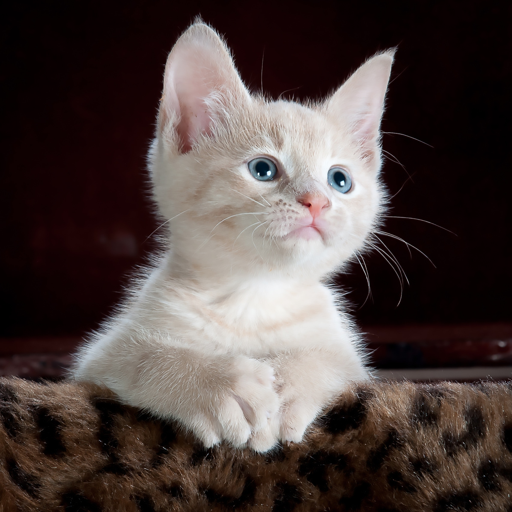

In [4]:
from io import BytesIO
from PIL import Image

IMG_DIR = "/content"
file_path = ""

import os
from google.colab import files
import shutil

uploaded = files.upload()
for filename in uploaded.keys():
    dst_path = os.path.join(IMG_DIR, filename)
    print(f'move {filename} to {dst_path}')
    shutil.move(filename, dst_path)
    file_path = dst_path

init_img = Image.open(file_path).convert("RGB")
init_img = init_img.resize((512, 512))
init_img

## ４．ライブラリのセットアップ

In [5]:
import inspect
import warnings
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_path = "./stable-diffusion-2"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
)
pipe = pipe.to(device)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


## ５．画像生成用のプロンプトを設定

In [6]:
# 下記はフィンセント・ファン・ゴッホの作風で描く猫を指定しています。その他の有名な画家のスタイルは以下を参照してください。
# https://webbigdata.jp/ai/post-14827
prompt = "A cat, by Vincent Van Gogh"

## ６．画像を生成

  0%|          | 0/37 [00:00<?, ?it/s]

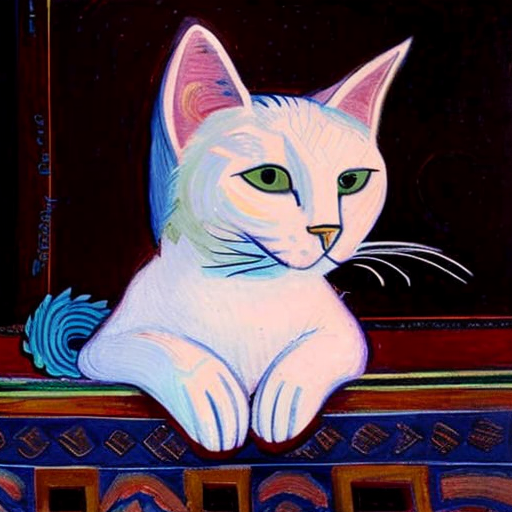

In [7]:
# 243212はシードと言って再現性を確保するための数字です。自由に変えてみてください。
generator = torch.Generator(device=device).manual_seed(243212)
with autocast("cuda"):
    image = pipe(prompt=prompt, image=init_img, strength=0.75, guidance_scale=7.5, generator=generator).images[0]

image
